# Lab II - Clustering

## Machine Learning II

Moisés Alfonso Guerrero Jiménez

In [27]:
# Modules
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from unsupervised.clustering.KMeans import KMeans
from unsupervised.clustering.KMedoids import KMedoids

### Workshop II

1. Research about the **Spectral Clustering** method, and answer the following questions:
    * In which cases might it be more useful to apply?
    * What are the mathematical fundamentals of it?
    * What is the algorithm to compute it?
    * Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

**Spectral Clustering**

Traditional clustering methods like K-means use a spherical or elliptical metric to group data points. Hence they will not work well when the clusters are non-convex like the following picture example.

<img src="imgs/concentric_circles.PNG"/>

Spectral clustering is a generalization of standard clustering methods, and is designed for these situations.

Consider a set un $N$ points $x_{i}\in \mathbb{R}^{p}$, and let $d_{ii'}$ be the Euclidean distance between $x_{i}$ and $x_{i'}$. We will use as similarity matrix the radial-kernel gram matrix; that is,

$$s_{ii'}=e^{-d_{ii'}^{2}/c}$$

where $c>0$ is a scale parameter.

There are many ways to define a similarity matrix and its associated similarity graph that reflect local behavior. The most popular is the mutual *K-nearest-neighbor graph*. Define $\mathcal{N}_{K}$ to be the symmetric set of nearby pairs of points; specifically a pair $(i, i')$ is in $\mathcal{N}_{K}$ if point $i$ is among the K-nearest neighbors of $i'$, or vice-versa. Then we connect all symmetric nearest neighbors, and give them edge weight $w_{ii'}=s_{ii'}$ ; otherwise the edge weight is zero. Equivalently we set to zero all the pairwise similarities not in $\mathcal{N}_{K}$, and draw the graph for this modified similarity matrix.

The matrix of edge weights $W=\{w_{ii'}\}$ from a similarity graph is called the adjacency matrix. The degree of vertex $i$ is $g_{i}=\sum_{i'}{w_{ii'}}$, the sum of the weights of the edges connected to it. Let $G$ be a diagonal matrix with diagonal elements $g_{i}$.

Finally, the graph Laplacian is defined by:

$$L=G-W$$

This is called the unnormalized graph Laplacian.

Spectral clustering finds the $m$ eigenvectors $Z_{N\times m}$ corresponding to the $m$ smallest eigenvalues of $L$ (ignoring the trivial constant eigenvector). Using a standard method like K-means, we then cluster the rows of $Z$ to yield a clustering of the original data points.

**The algorithm**

<img src="imgs/spectral_clustering_alg.png" width=600/>

* The image was taken from https://medium.com/@roiyeho/spectral-clustering-50aee862d300





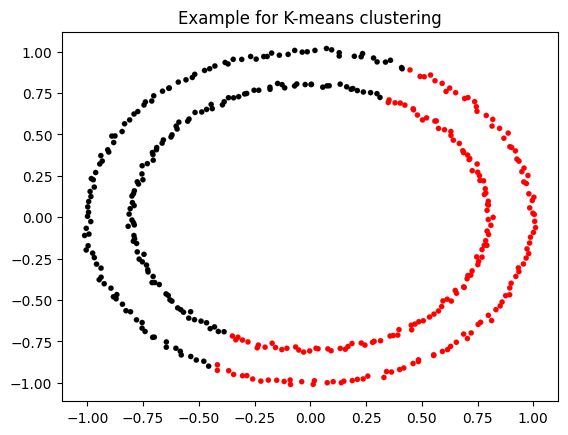

c:\Users\Moisés Guerrero\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


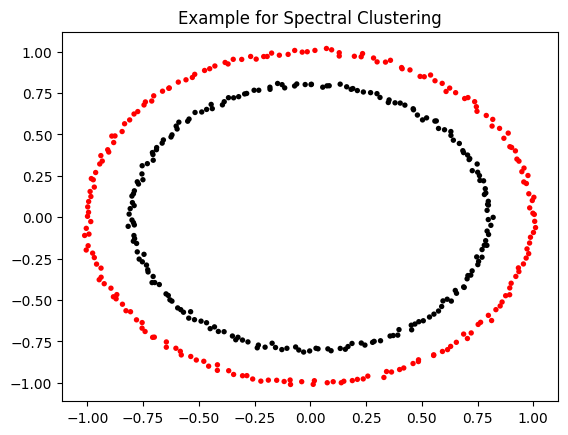

In [28]:
# In Python we can implement this as follows
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data

circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)

# cluster with kmeans
Kmean = skl_cluster.KMeans(n_clusters=2)
Kmean.fit(circles)
clusters = Kmean.predict(circles)

# plot the data, colouring it by cluster
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0.1, c=clusters, cmap='flag')
plt.title("Example for K-means clustering")
plt.show()

# cluster with spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(circles)
# print(f"Affinity matrix: \n{model.affinity_matrix_}")
# print(f"Labels: \n{model.labels_}")
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, c=labels, cmap='flag')
plt.title("Example for Spectral Clustering")
plt.show()

This clustering method is strongly related to K-means because of the way we construct the similarity matrix.

2. Research about the DBSCAN method, and answer the following questions:
    * In which cases might it be more useful to apply?
    * What are the mathematical fundamentals of it?
    * Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?

**DBSCAN**

DBSCAN stands for ***Density-Based Spatial Clustering Application with Noise***. It is an unsupervised machine learning algorithm that makes clusters based upon the density of the data points or how close the data is. That said, the points which are outside the dense regions are excluded and treated as noise or outliers.

The key idea is that for each point of a cluster the neighborhood of a given radius has to contain at least a minimum number of points. The shape of the neighborhood is determined by the choice of a distance function for two points p and q, denoted by $dist(p,q)$.

*Definition 1*

The eps-neighborhood of a point p, denoted by $N_{Eps}(p)$, is defined by $N_{Eps}(p)=\{q\in D | dist(p,q) \leq Eps\}$. 

A naive approach could require for each point in a cluster that there are at least a minimum number (MinPts) of points in an Eps-neighborhood of that point. However, this approach fails because there are two kinds of points in a cluster, points inside of the cluster (core points) and point on the border of the cluster (border points). In general, an Eps-neighborhood of a border point contains significantly less points than an Eps-neighborhood of a core point.

*Definition 2*

A point p is directly density-reachable from a point q with respect to Eps, MinPts if
1. $p\in N_{Eps}(q)$ and
2. $|N_{Eps}(q)|\geq MinPts$ (core point condition).

*Definition 3* 

A point p is density-reachable from a point q with respect to Eps and MinPts if there is a chain of points $p_{1},...,p_{n}$, $p_{1}=q$, $p_{n}=p$ such that $p_{i+1}$ is directly reachable from $p_{i}$.

<img src="imgs/density_connected.PNG"/>

*Image taken from the original paper

*Definition 4*

A point p is density-connected to a point q with respect to Eps and MinPts if there is a point o such that both, p and q are density reachable from o with respect to Eps and MinPts.

Intuitively, a cluster is defined to be a set of density connected point which is maximal with respect to density-reachability. Noise is simply the set of points in D not belonging to any of its clusters.

*Definition 5*

Let D be a database of point. A cluster C with respect to Eps and MinPts is a non-empty subset of D satifying the following conditions:
1. $\forall p,q:if\ p\in C$ and $q$ is density-reachable from p with respect to Eps and MinPts, then $q\in C$ (Maximality).
2. $\forall p,q \in C: p$ is density-connected to $q$ with respect to Eps and MinPts (Connectivity).

*Definition 6*

Let $C_{1},...,C_{k}$ be the clusters of the database D with respect to parameters $Eps_{i}$ and $MinPts_{i}$, i=1,...,k. Then we define the noise as the set of point in the database D not belonging to any cluster $C_{i}$, i.e. $noise=\{p\in D | \forall i:p\notin C_{i}\}$.

**The algorithm**

This algorithm was taken from the original paper included on the references. It is a basic version of DBSCAN omitting details of data types and generation of additional information about clusters:

<img src="imgs/DBSCANalg.PNG"/>

<br>

<img src="imgs/ExpandClustalg.PNG"/>

**Relationship between DBSCAN and Spectral Clustering**

The relationship between DBSCAN and Spectral Clustering lies in the fact that they both aim to partition the dataset into meaningful clusters but they operate based on different principles:

1. DBSCAN focuses on density and proximity relationships among data points.
2. Spectral Clustering focuses on the spectral properties of the data, which captures global structure, including connectivity patterns.

In some cases, Spectral Clustering might be preferred over DBSCAN when the underlying structure of the data is better captured by considering global relationships rather than just local density. However, the choice between the two often depends on the specific characteristics of the dataset and the clustering goals.

**References**

https://file.biolab.si/papers/1996-DBSCAN-KDD.pdf

https://towardsdatascience.com/dbscan-make-density-based-clusters-by-hand-2689dc335120#:~:text=DBSCAN%20stands%20for%20Density%2DBased,treated%20as%20noise%20or%20outliers.

3. What is the elbow method in clustering? And which flaws does it pose to assess quality?

**R/** The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.

**Flaws it presents when assessing quality**

* The choice of the "elbow point" can be subjective and might vary between individuals analyzing the same data.
* It assumes that clusters are spherical and equally sized, which may not hold for complex datasets with irregularly shaped or differently sized clusters.
* Sensitivity to the initial cluster centroids, which can affect the WCSS values and, consequently, the choice of the optimal K.
* For large datasets, calculating WCSS for a range of K values can be computationally expensive and  time-consuming.
* It specifically applies to k-means clustering and may not be suitable for other clustering algorithms with different objectives.

**References**
- https://builtin.com/data-science/elbow-method
- https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

4. Remember the unsupervised Python package you created in the previous unit? 😀It’s time for an upgrade.
    * Implement the k-means module using Python and Numpy
    * Implement the k-medoids module using Python and Numpy
    * Remember to keep consistency with Scikit-Learn API as high as possible

Here I included the implementations of KMeans and KMedoids on the python package and those were imported to the notebook and tested with the following example data

### K-means module

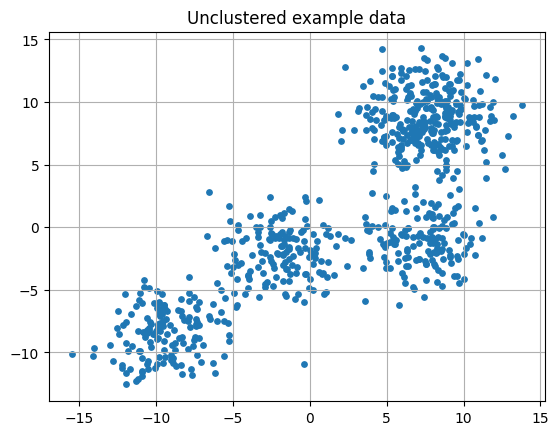

In [24]:
# Example of clustering by using k-means module

# Specifying the number of cluster our data should have
n_components = 5

X, true_labels = make_blobs(
    n_samples=750, centers=n_components, cluster_std=2.0, random_state=987
)

plt.title("Unclustered example data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.grid()
plt.show()

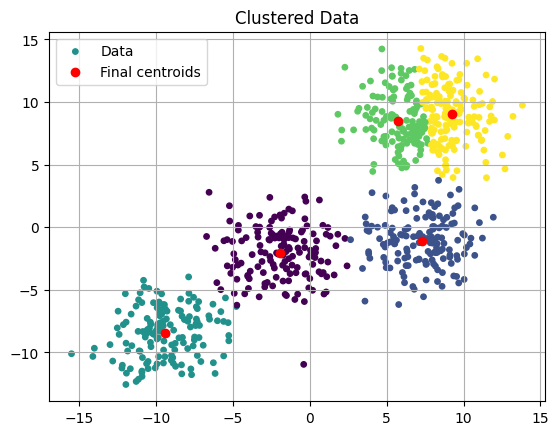

In [25]:
# Using KMeans module
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
predicted_labels = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], s=15, c=predicted_labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c='red')
plt.title("Clustered Data")
plt.legend(['Data', 'Final centroids'])
plt.grid()
plt.show()

### K-medoids module

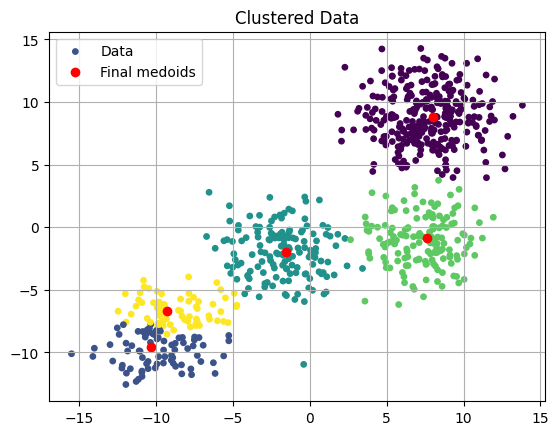

In [26]:
# Using KMedoids module
kmedoids = KMedoids(n_clusters=5)
kmedoids.fit(X)
predicted_labels = kmedoids.predict(X)

plt.scatter(X[:, 0], X[:, 1], s=15, c=predicted_labels)
plt.scatter(kmedoids.medoids[:,0], kmedoids.medoids[:,1], c='red')
plt.title("Clustered Data")
plt.legend(['Data', 'Final medoids'])
plt.grid()
plt.show()

5. Let’s use the newly created modules in unsupervised to cluster some toy data.
    * Use the following code snippet to create scattered data X
    <pre>
        from sklearn.datasets import make_blobs
        X, y = make_blobs(
            n_samples=500,
            n_features=2,
            centers=4,
            cluster_std=1,
            center_box=(-10.0, 10.0),
            shuffle=True,
            random_state=1,
        )
    </pre>
   * Plot the resulting dataset. How many clusters are there? How far are they from one another?
   * For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.
   * What number of K got the best silhouette score? What can you say about the figures? Is this the expected result?

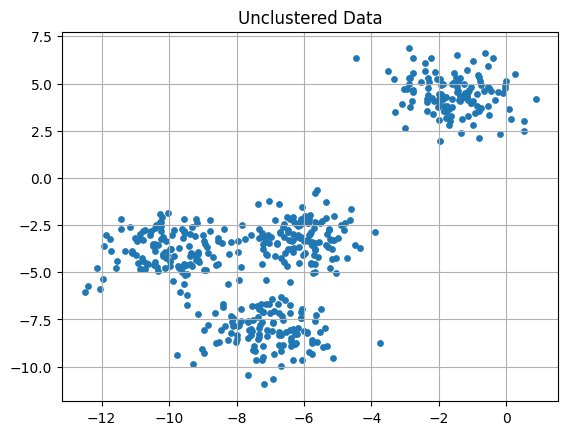

In [30]:
from sklearn.datasets import make_blobs
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

plt.scatter(X[:, 0], X[:, 1], s=15)
plt.title("Unclustered Data")
plt.grid()
plt.show()

**R/** According to the argument `centers` included in the function `make_blobs`, the generated clusters are 4, and for the configured `random_state` there were generated three clusters that are pretty close between them and one that is farther that the others.

Here I'll use `sklearn.metrics.silhouette_samples` to calculate the silhouette plots, however I'll iterate K from 2 to 5 because this function fails if I only set a K of 1.

**References**

https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111

### K-means

The first implementation is by using the module `unsupervised.clustering.KMeans`

Generating graphics for KMeans module...


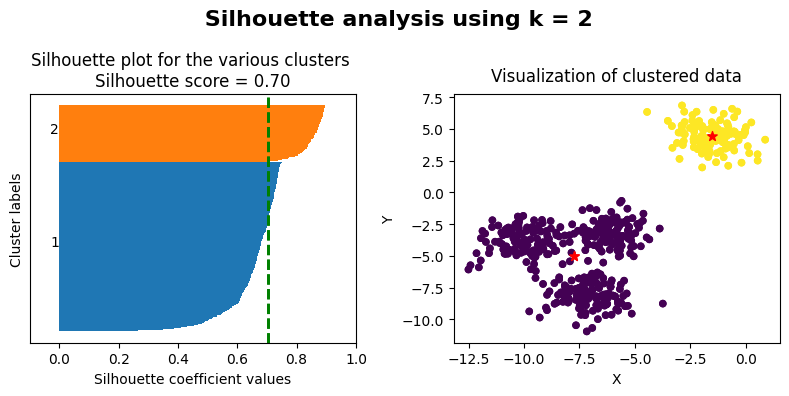

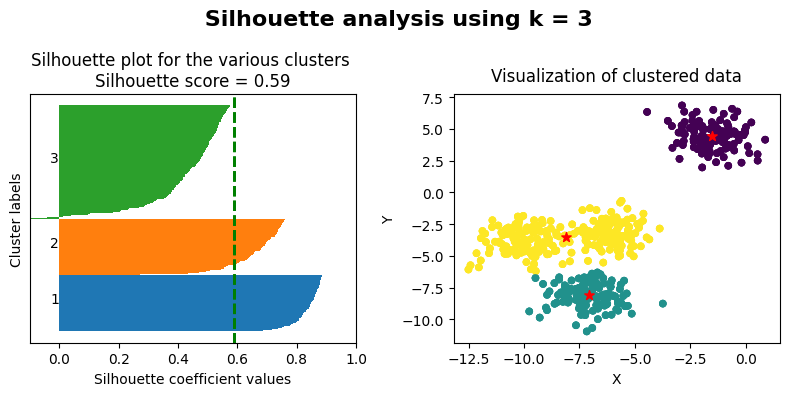

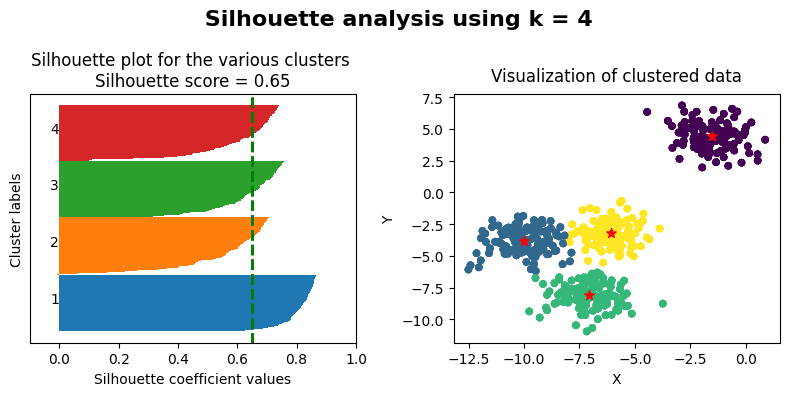

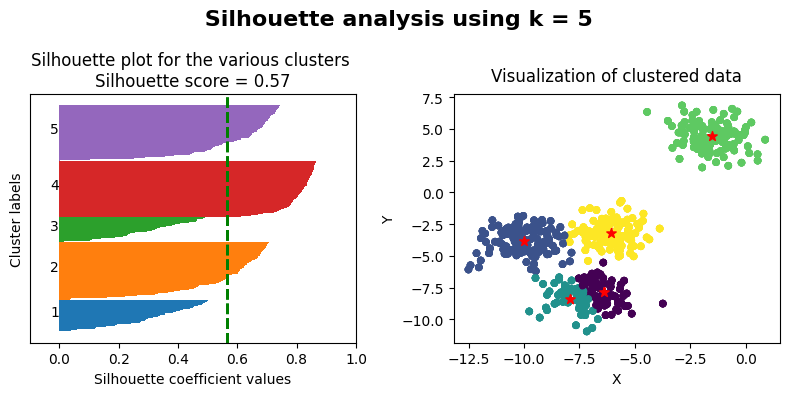

In [31]:
from sklearn.metrics import silhouette_samples

print("Generating graphics for KMeans module...")

for index, k in enumerate(range(2,6)):
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_predict = kmeans.predict(X)
    centroids = kmeans.centroids
    
    silhouette_vals = silhouette_samples(X,y_predict)

    y_ticks = []
    y_lower = y_upper = 0

    for i,cluster in enumerate(np.unique(y_predict)):
        cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
   
        ax[0].barh(range(y_lower,y_upper),
        cluster_silhouette_vals,height =1);
        ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
        y_lower += len(cluster_silhouette_vals)

        # Get the average silhouette score 
        avg_score = np.mean(silhouette_vals)
        ax[0].axvline(avg_score,linestyle ='--',
        linewidth =2,color = 'green')
        ax[0].set_yticks([])
        ax[0].set_xlim([-0.1, 1])
        ax[0].set_xlabel('Silhouette coefficient values')
        ax[0].set_ylabel('Cluster labels')
        ax[0].set_title('Silhouette plot for the various clusters \nSilhouette score = {:.2f}'.format(avg_score));
    
    
        # scatter plot of data colored with labels

        ax[1].scatter(X[:,0],X[:,1], c = y_predict, s=20);
        ax[1].scatter(centroids[:,0],centroids[:,1],marker = '*', c= 'r',s =50);
        ax[1].set_xlabel('X')
        ax[1].set_ylabel('Y')
        ax[1].set_title('Visualization of clustered data', y=1.02)
        plt.tight_layout()
        plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')


**R/** It is observed that for K = 2, the score is higher due to the characteristics mentioned about the three nearby clusters and the single cluster far from the others, since a centroid is generated for the set of the 3 clusters and another for the other cluster. When observing the silhouette plot, it is identified that although the score is high, the cluster that unifies the 3 groups generated presents greater differences, which suggests that this cluster could be separated into smaller clusters.

For K = 3, the score is lower given that one of the generated clusters presents values with many differences and several outliers because it can be separated, and in comparison with the 2 generated clusters.

For K = 4, a good score is presented, not as high as the one obtained for K = 2, but observing a better relationship between the data of each cluster.

Finally, for K = 5, one of the clusters was divided into 2 groups, showing a decrease in the score obtained.

Generating graphics for KMedoids module...


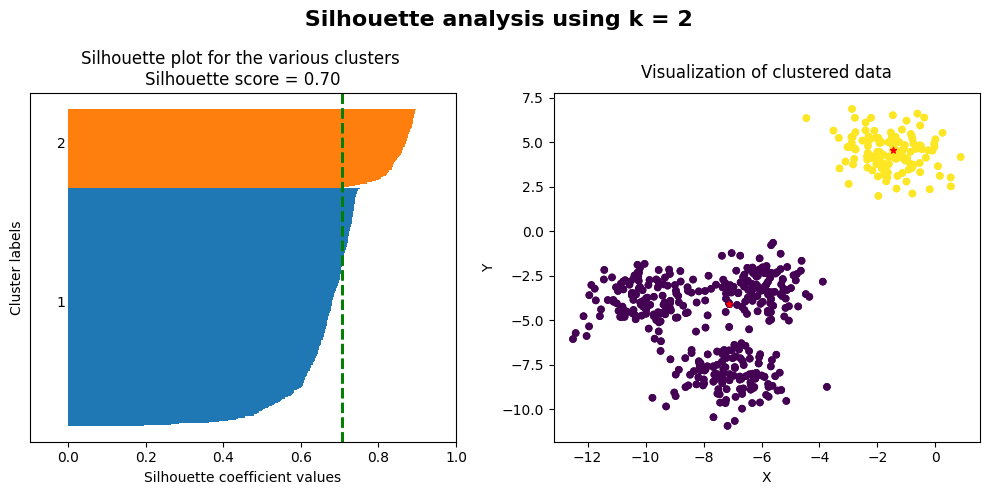

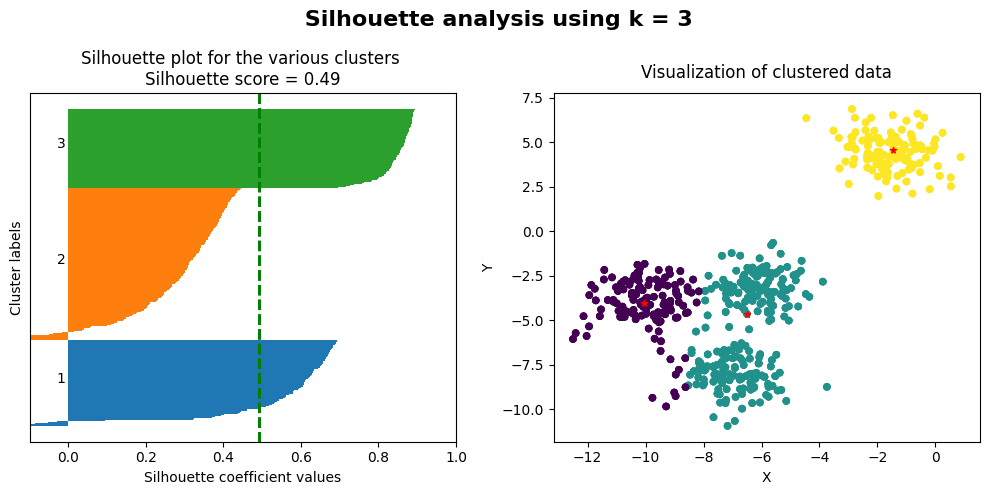

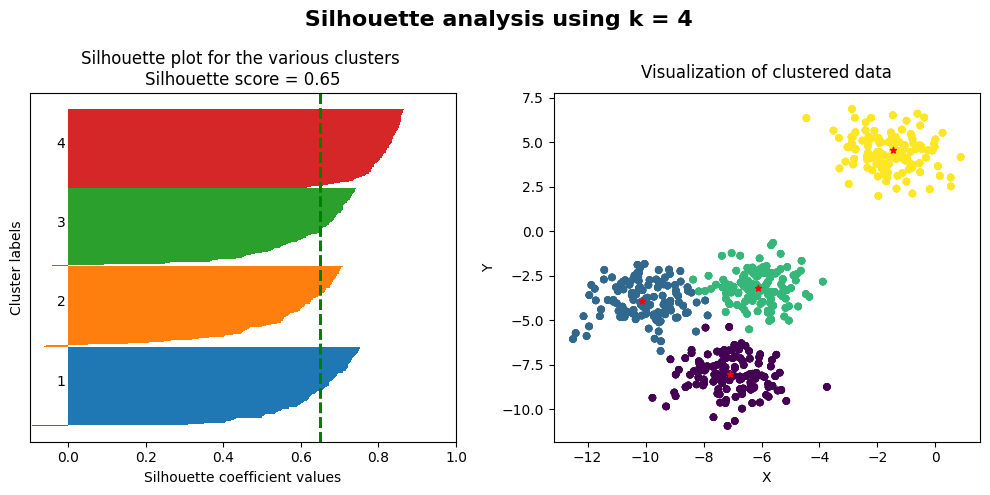

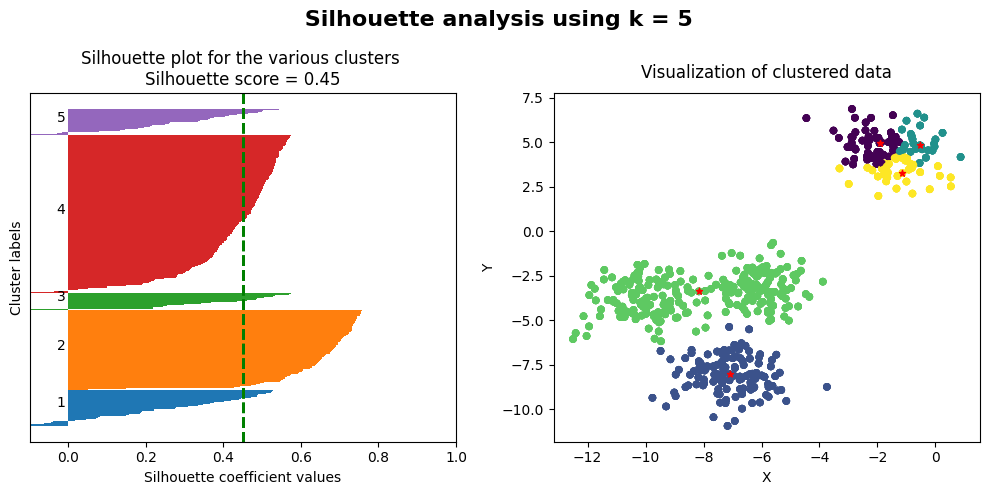

In [36]:
from sklearn.metrics import silhouette_samples

print("Generating graphics for KMedoids module...")

for index, k in enumerate(range(2,6)):
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    kmedoids = KMedoids(n_clusters=k)
    kmedoids.fit(X)
    y_predict = kmedoids.predict(X)
    medoids = kmedoids.medoids
    
    silhouette_vals = silhouette_samples(X,y_predict)

    y_ticks = []
    y_lower = y_upper = 0

    for i,cluster in enumerate(np.unique(y_predict)):
        cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
   
        ax[0].barh(range(y_lower,y_upper),
        cluster_silhouette_vals,height =1);
        ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
        y_lower += len(cluster_silhouette_vals)

        # Get the average silhouette score 
        avg_score = np.mean(silhouette_vals)
        ax[0].axvline(avg_score,linestyle ='--',
        linewidth =2,color = 'green')
        ax[0].set_yticks([])
        ax[0].set_xlim([-0.1, 1])
        ax[0].set_xlabel('Silhouette coefficient values')
        ax[0].set_ylabel('Cluster labels')
        ax[0].set_title('Silhouette plot for the various clusters \nSilhouette score = {:.2f}'.format(avg_score));
    
    
        # scatter plot of data colored with labels

        ax[1].scatter(X[:,0],X[:,1], c = y_predict, s=20);
        ax[1].scatter(medoids[:,0],medoids[:,1],marker = '*', c= 'r',s =20);
        ax[1].set_xlabel('X')
        ax[1].set_ylabel('Y')
        ax[1].set_title('Visualization of clustered data', y=1.02)
        plt.tight_layout()
        plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')

**R/** Here we can se a similar situation, but with the characteristic that medoids are part of the original data points. This increases in some cases the outliers that can been observed on the silhouette plot.

6. Use the following code snippet to create different types of scattered data:
    <pre>
    import numpy as np
    from sklearn import cluster, datasets, mixture
    # ============
    # Generate datasets. We choose the size big enough to see the scalability
    # of the algorithms, but not too big to avoid too long running times
    # ============
    n_samples = 500
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
    blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
    no_structure = np.random.rand(n_samples, 2), None
    # Anisotropically distributed data
    random_state = 170
    X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)
    aniso = (X_aniso, y)
    # blobs with varied variances
    varied = datasets.make_blobs(n_samples=n_samples, 
        cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
    </pre>
    * Plot the different datasets in separate figures. What can you say about them?
    * Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.

In [10]:
import numpy as np
from sklearn import cluster, datasets, mixture
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, 
    cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

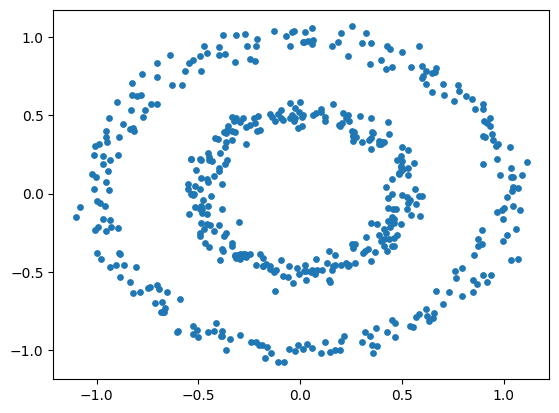

In [11]:
plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1], s=15);

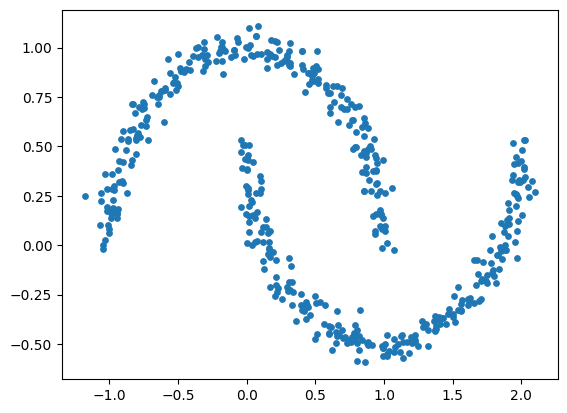

In [12]:
plt.scatter(noisy_moons[0][:,0], noisy_moons[0][:,1], s=15);

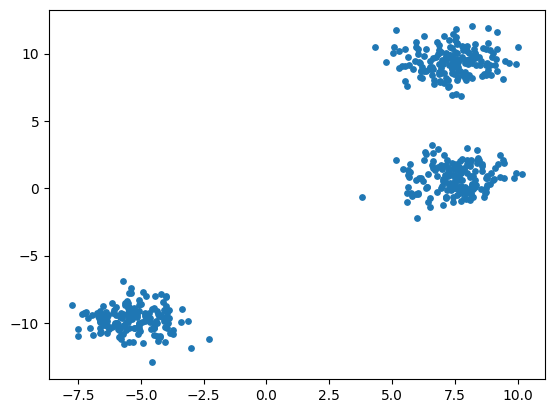

In [13]:
plt.scatter(blobs[0][:,0], blobs[0][:,1], s=15);

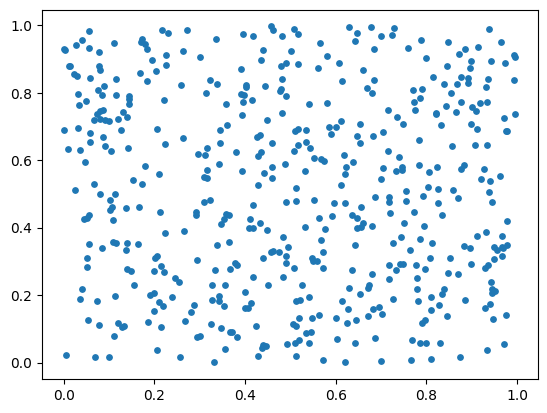

In [14]:
plt.scatter(no_structure[0][:,0], no_structure[0][:,1], s=15);

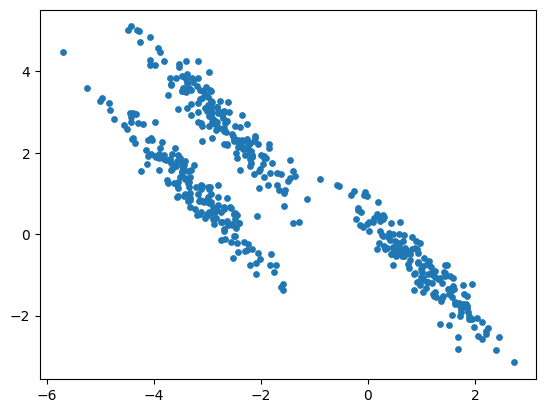

In [15]:
plt.scatter(aniso[0][:,0], aniso[0][:,1], s=15);

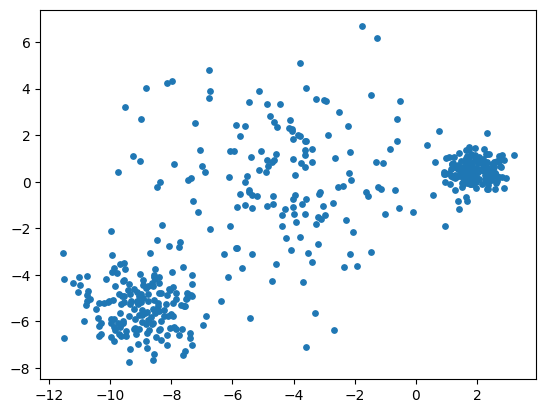

In [16]:
plt.scatter(varied[0][:,0], varied[0][:,1], s=15);

**R/** It is observed that the data points are not distributed as in previous exercises, but rather present more complex groupings among them.

c:\Users\Moisés Guerrero\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Moisés Guerrero\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Moisés Guerrero\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


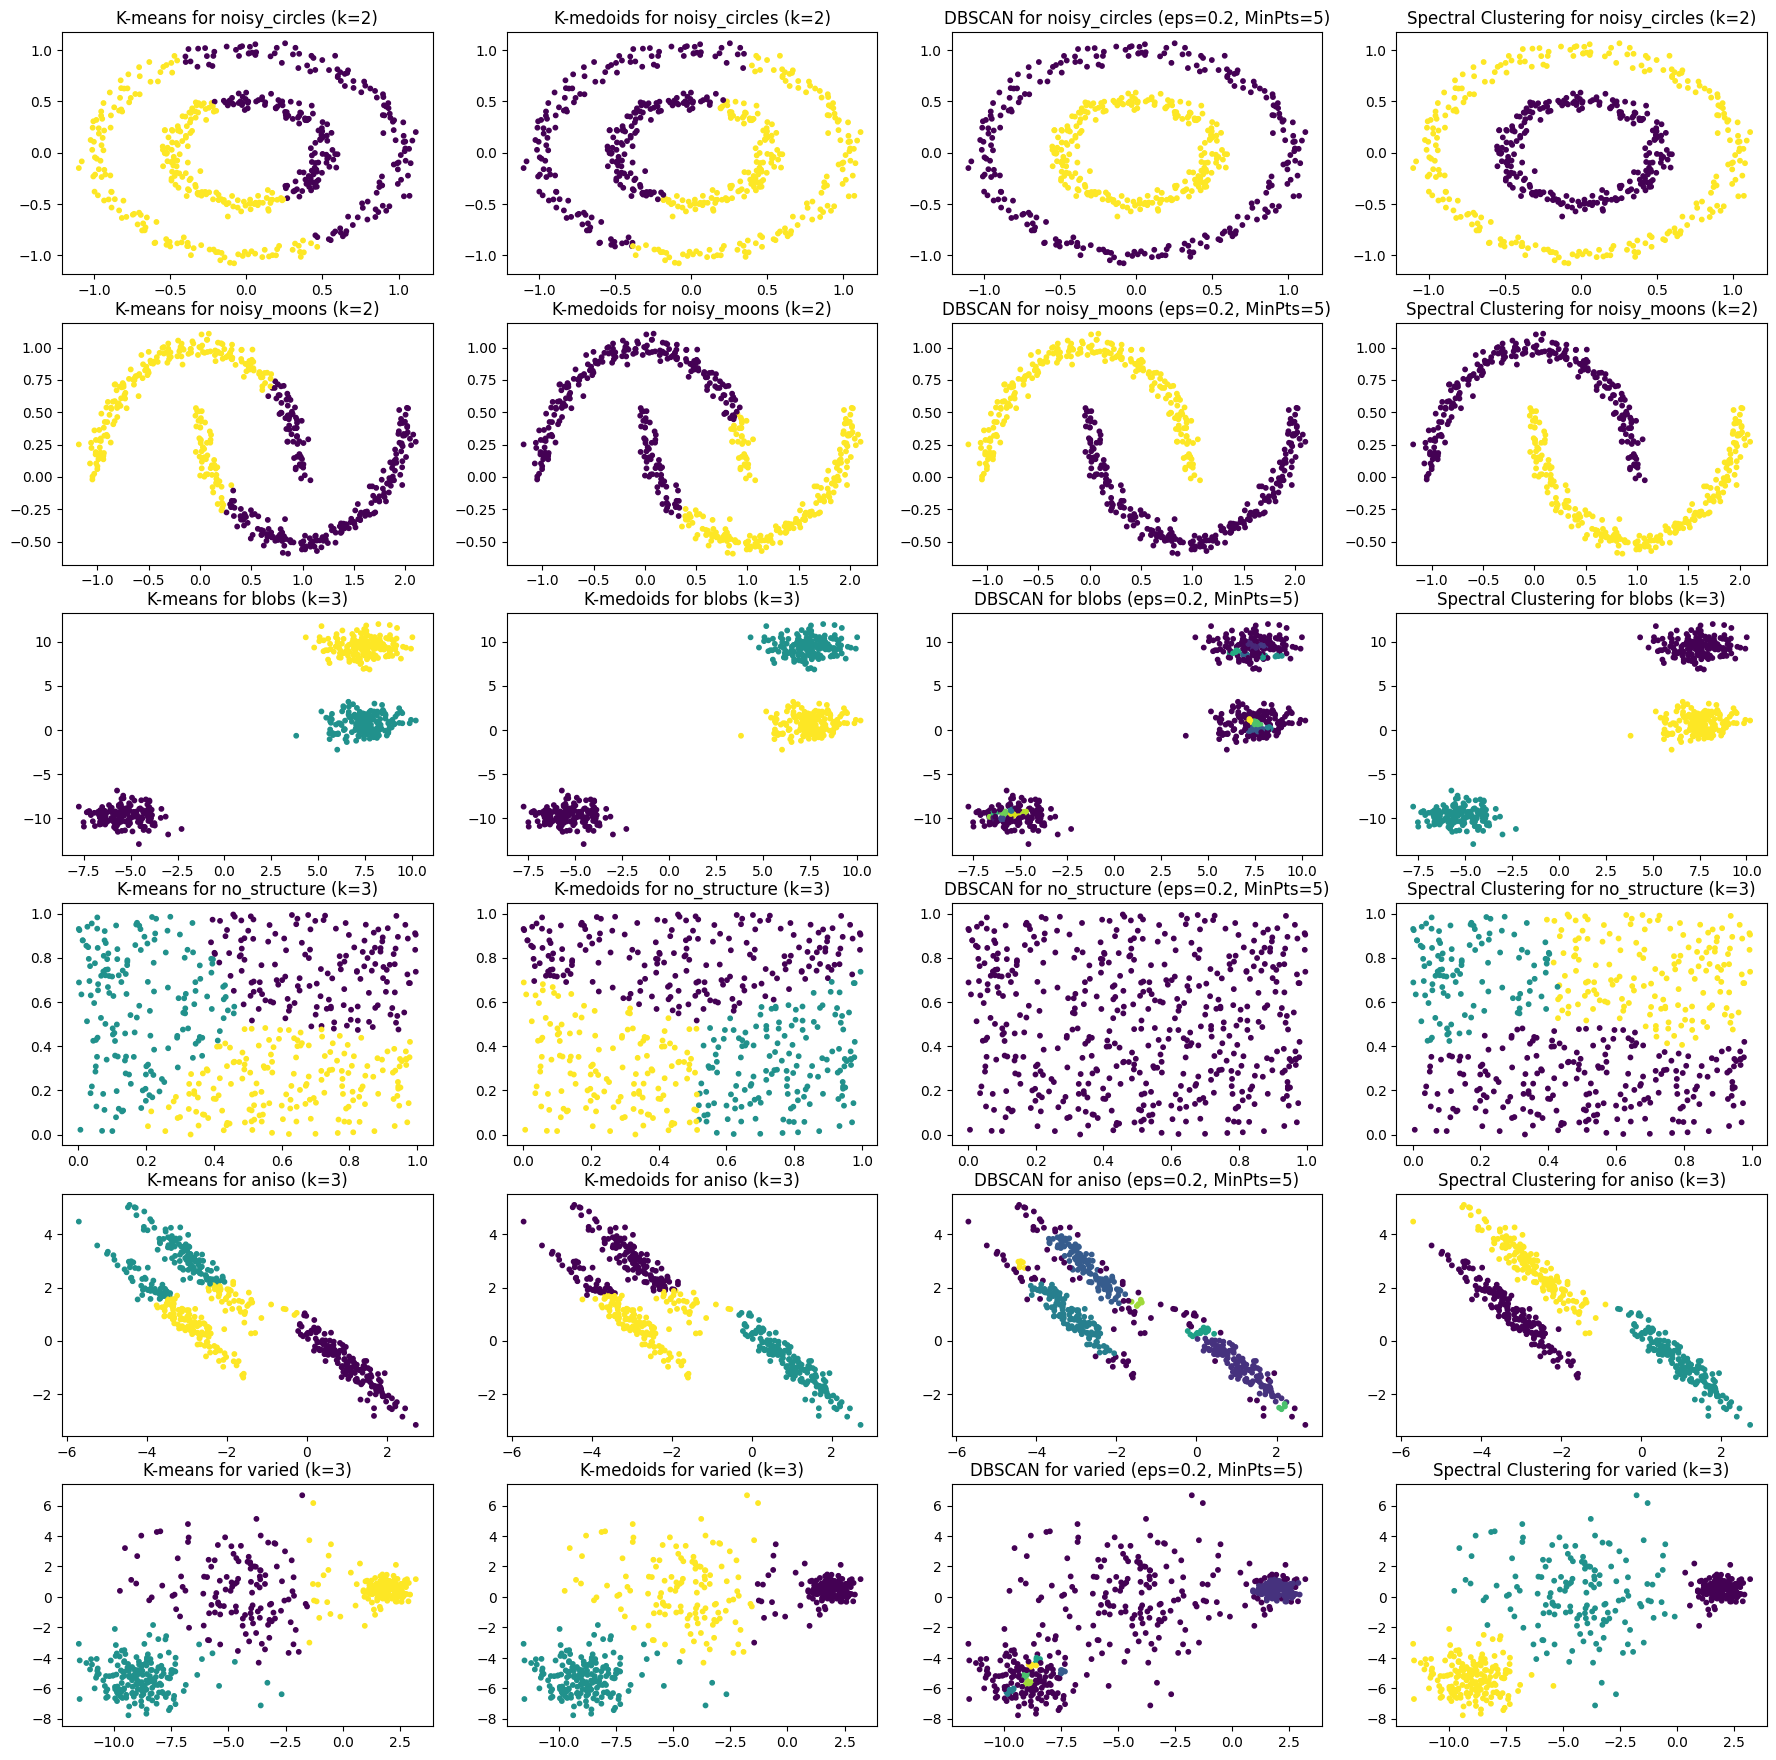

In [93]:
# Lets import scikit-learn modules for k-means, k-medoids, DBSCAN and spectral clustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

data = [noisy_circles[0], noisy_moons[0], blobs[0], no_structure[0], aniso[0], varied[0]]
n_clusters = [2, 2, 3, 3, 3, 3]
names = ['noisy_circles', 'noisy_moons', 'blobs', 'no_structure', 'aniso', 'varied']

fig, axs = plt.subplots(6,4, figsize=(22,22))
for i in range(6):
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters[i])
    y_kmeans = kmeans.fit_predict(data[i])
    axs[i, 0].scatter(data[i][:,0], data[i][:,1], s=10, c=y_kmeans)
    axs[i, 0].set_title(f"K-means for {names[i]} (k={n_clusters[i]})")
    # KMedoids
    kmedoids = KMedoids(n_clusters=n_clusters[i])
    y_kmedoids = kmedoids.fit_predict(data[i])
    axs[i, 1].scatter(data[i][:,0], data[i][:,1], s=10, c=y_kmedoids)
    axs[i, 1].set_title(f"K-medoids for {names[i]} (k={n_clusters[i]})")
    # DBSCAN
    eps = 0.2
    min_samples = 5
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_dbscan = dbscan.fit_predict(data[i])
    axs[i, 2].scatter(data[i][:,0], data[i][:,1], s=10, c=y_dbscan)
    axs[i, 2].set_title(f"DBSCAN for {names[i]} (eps={eps}, MinPts={min_samples})")
    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters[i], affinity='nearest_neighbors', assign_labels='kmeans')
    y_spectral = spectral.fit_predict(data[i])
    axs[i, 3].scatter(data[i][:,0], data[i][:,1], s=10, c=y_spectral)
    axs[i, 3].set_title(f"Spectral Clustering for {names[i]} (k={n_clusters[i]})")

**R/** It is observed that each clustering algorithm presents certain advantages for certain cases:
* K-means and k-medoids fail to separate clusters with more complex shapes such as "noisy_circles" and "noisy_moons". However, it is observed a better clustering for blobs in addition to spectral clustering.
* In the case of the "no_structure" dataset it is separated into clusters similarly for k-means, k-medoids and spectral clustering, but for DBSCAN it is not possible to specify groupings so all values are marked as noise, although this can be adjusted by variations of the eps and MinPts parameters.
* In the case of "noisy_circles" and "noisy_moons" a better clustering is observed for DBSCAN and Spectral Clustering.
* The best clustering for "aniso" data is with spectral clustering.
* For "varied" data, similar clusters are generated for "k-means", "k-medoids" and spectral clustering, but for DBSCAN the values of eps and MinPts must be adjusted to optimize the generated clusters.